In [1]:
from numpy import subtract,float128
data = { # Phenotype observations
    'A' :64,
    'B' :10,
    'AB':14,
    'O' :12,
}
theta_m = { # Initial estimations of P_hat_A, P_hat_B, P_hat_O
    'A':float128(1/3.0),
    'B':float128(1/3.0),
    'O':float128(1/3.0)
}


In [2]:
def Q(N, P):
    numAlleles =  float(sum(N.values()) *2)
    P_M_A = 1/numAlleles * (2*N['A']*((P['A']**2 + P['A']*P['O'])/(P['A']**2 + 2*P['A']*P['O'])) + N['AB'])
    P_M_B = 1/numAlleles * (2*N['B']*((P['B']**2 + P['B']*P['O'])/(P['B']**2 + 2*P['B']*P['O'])) + N['AB'])
    
    P_M_O = 1/numAlleles * (2*N['A']*((P['A']*P['O'])/(P['A']**2 + 2*P['A']*P['O'])) + # Alleles from AO
                              2*N['B']*((P['B']*P['O'])/(P['B']**2 + 2*P['B']*P['O'])) + # Alleles from BO
                              2*N['O']) # Alleles from OO
    return {'A':P_M_A,'O':P_M_O,'B':P_M_B}
                             

In [3]:
dif = 1 # Initialize the difference between the 2 theta vectors to be greater than the cuttoff so the loop will run
m = 1 #The mth EM estimation
cutoff = float128(1.0*10**-8) # cuttoff value for when to stop the EM
while dif > cutoff:
    theta_m_plus_1 = Q(data,theta_m)
    dif = sum(abs(subtract(list(theta_m.values()),list(theta_m_plus_1.values()))))
    print("%i. %s" % (m,str(theta_m_plus_1)))
    m+=1
    theta_m = theta_m_plus_1

1. {'A': 0.49666666666666668093, 'O': 0.36666666666666666974, 'B': 0.13666666666666667013}
2. {'A': 0.51921409214092142454, 'O': 0.35293150172881039531, 'B': 0.12785440613026820096}
3. {'A': 0.5256229008623484429, 'O': 0.3467093687616320018, 'B': 0.12766773037601957606}
4. {'A': 0.52797668839162816397, 'O': 0.3442489945682522981, 'B': 0.1277743170401195587}
5. {'A': 0.52888701787745494987, 'O': 0.34328628531602178867, 'B': 0.12782669680652328228}
6. {'A': 0.52924267603855675875, 'O': 0.34290941066404053767, 'B': 0.12784791329740272442}
7. {'A': 0.52938196272318839103, 'O': 0.34276175485448494689, 'B': 0.12785628242232668289}
8. {'A': 0.52943655034517914587, 'O': 0.34270388124291668272, 'B': 0.12785956841190419225}
9. {'A': 0.529457948908407969, 'O': 0.34268119380922928442, 'B': 0.1278608572823627674}
10. {'A': 0.52946633798959585594, 'O': 0.34267229933514293318, 'B': 0.12786136267526123165}
11. {'A': 0.52946962695488710066, 'O': 0.34266881221348182316, 'B': 0.12786156083163109697}
12. 

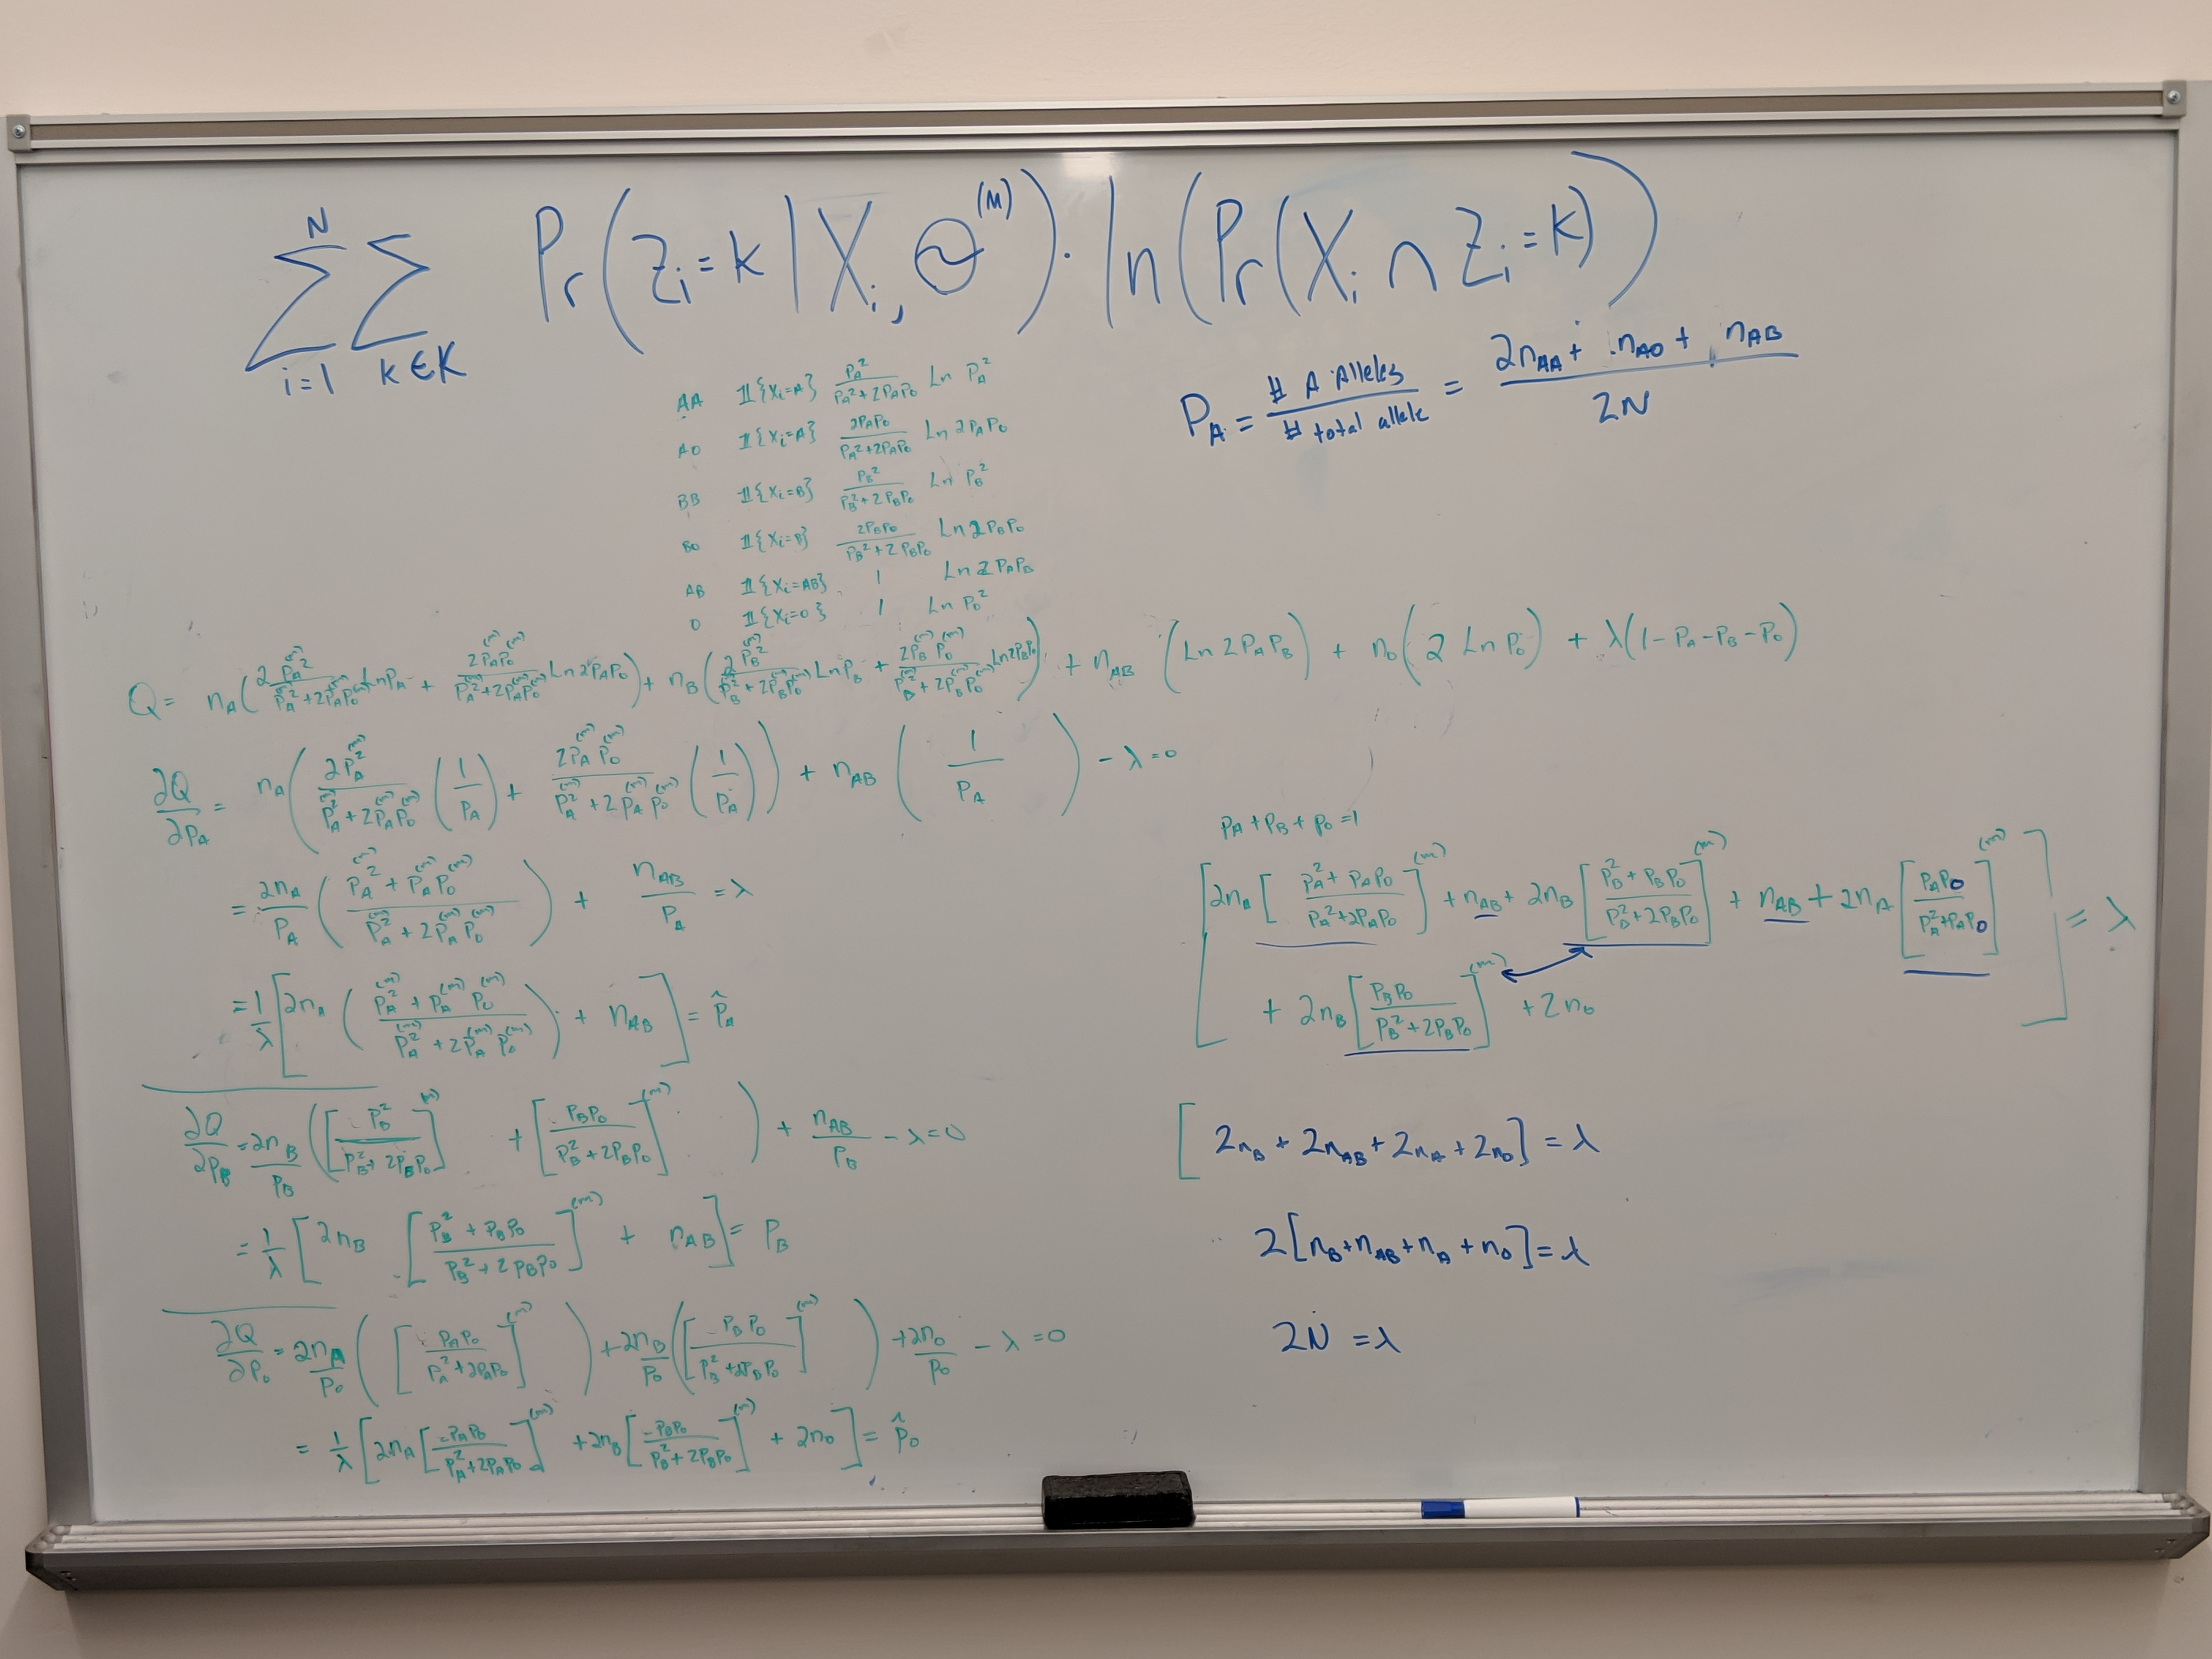

In [5]:
from IPython.display import display, Image
display(Image("img/q1.jpg"))

# Assumptions
1. HardyWeinberg equalibream (and all the assumptions HWE makes)
2. Phenotypic observations are correct and there are only 3 alleles that contribute to the phenotype, alleles A, B, and O and each individual has 2 alleles


### Variable definitions

N 

$\begin{array} {|r|r|} \hline x &4 &5 &6 &7 \ \hline P(X=x) &0.2 &0.4 &0.3 &0.1 \ \hline \end{array}$

$\begin{array}{rr} \hline
Varialbe &definition &value \\ \hline
X_i &The\ observed\ phenotype\ of\ the\ i^{th}\ individual & \\ \hline
Z_i &The\ hidden\ genotype\ of\ the\ i^{th}\ individual & \\ \hline
\Omega &Phenotyp Sample\ Space &\{A, B, O, AB\} \\ \hline

N &Number\ of\ individuals\ in\ our\ experiment &100 \\ \hline

\end{array}$


In a random experiment with N = 100 indivduals, the blood phenotype of each individual was observed. Let $X_1,..., X_N$ be IID random variables for outcome of each phenotype observed from the sample space $\Omega = \{A, B, O, AB\}$. Let $Z_1,...,Z_N$ be the hidden genotypes (AA, AO, AB, BB, BO, or OO) for each observation. We assume . Estimate $\hat{p} = (\hat{p}A,\hat{p}B,\hat{p}O)$ In our experiment we observed N = 100 individuals. Using our assumptions from above, the likelihood of an observation given it's hidden genotype can be expressed as:

X = $\{x_1,...,x_n\}$ the entire multi-set of phenotypic observations for N individuals

L($\theta$ | X,Z) = $\prod L_c(p | X_i,Z_i)$

$l_c(\theta | X,Z)$ = $\prod{i=1}{N}$

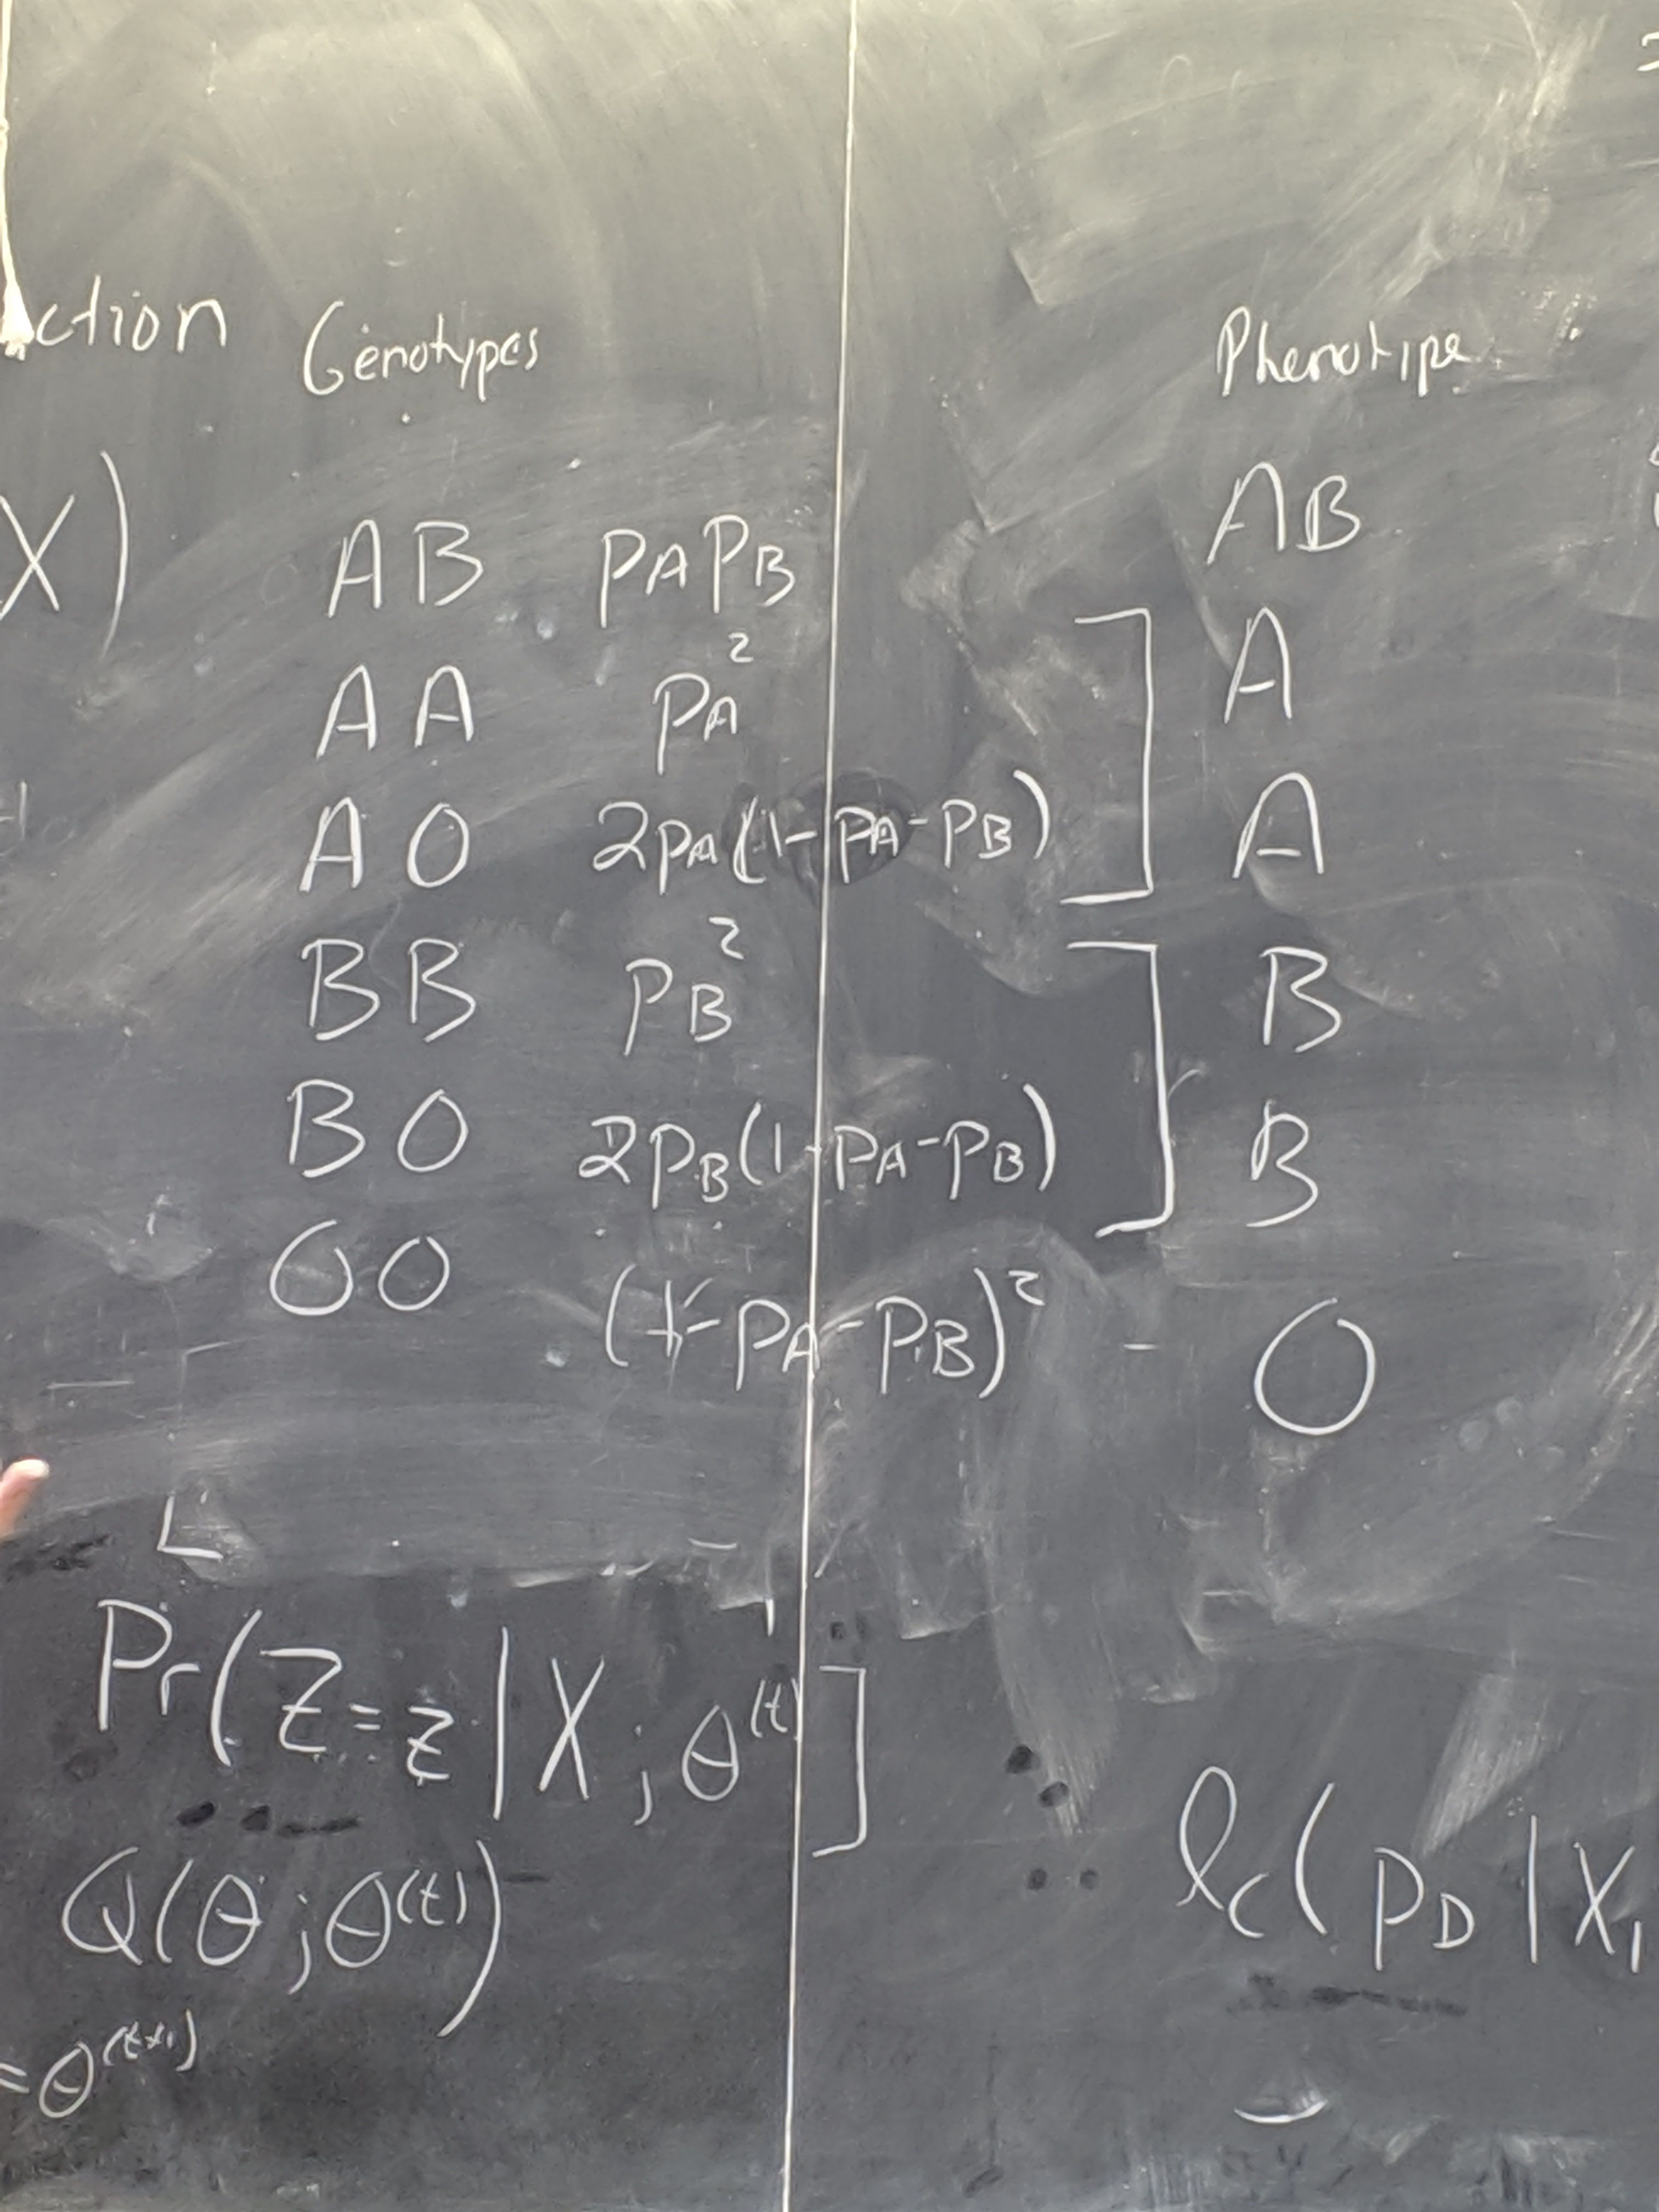

In [10]:
from IPython.display import display, Image
display(Image("img/5.jpg"))

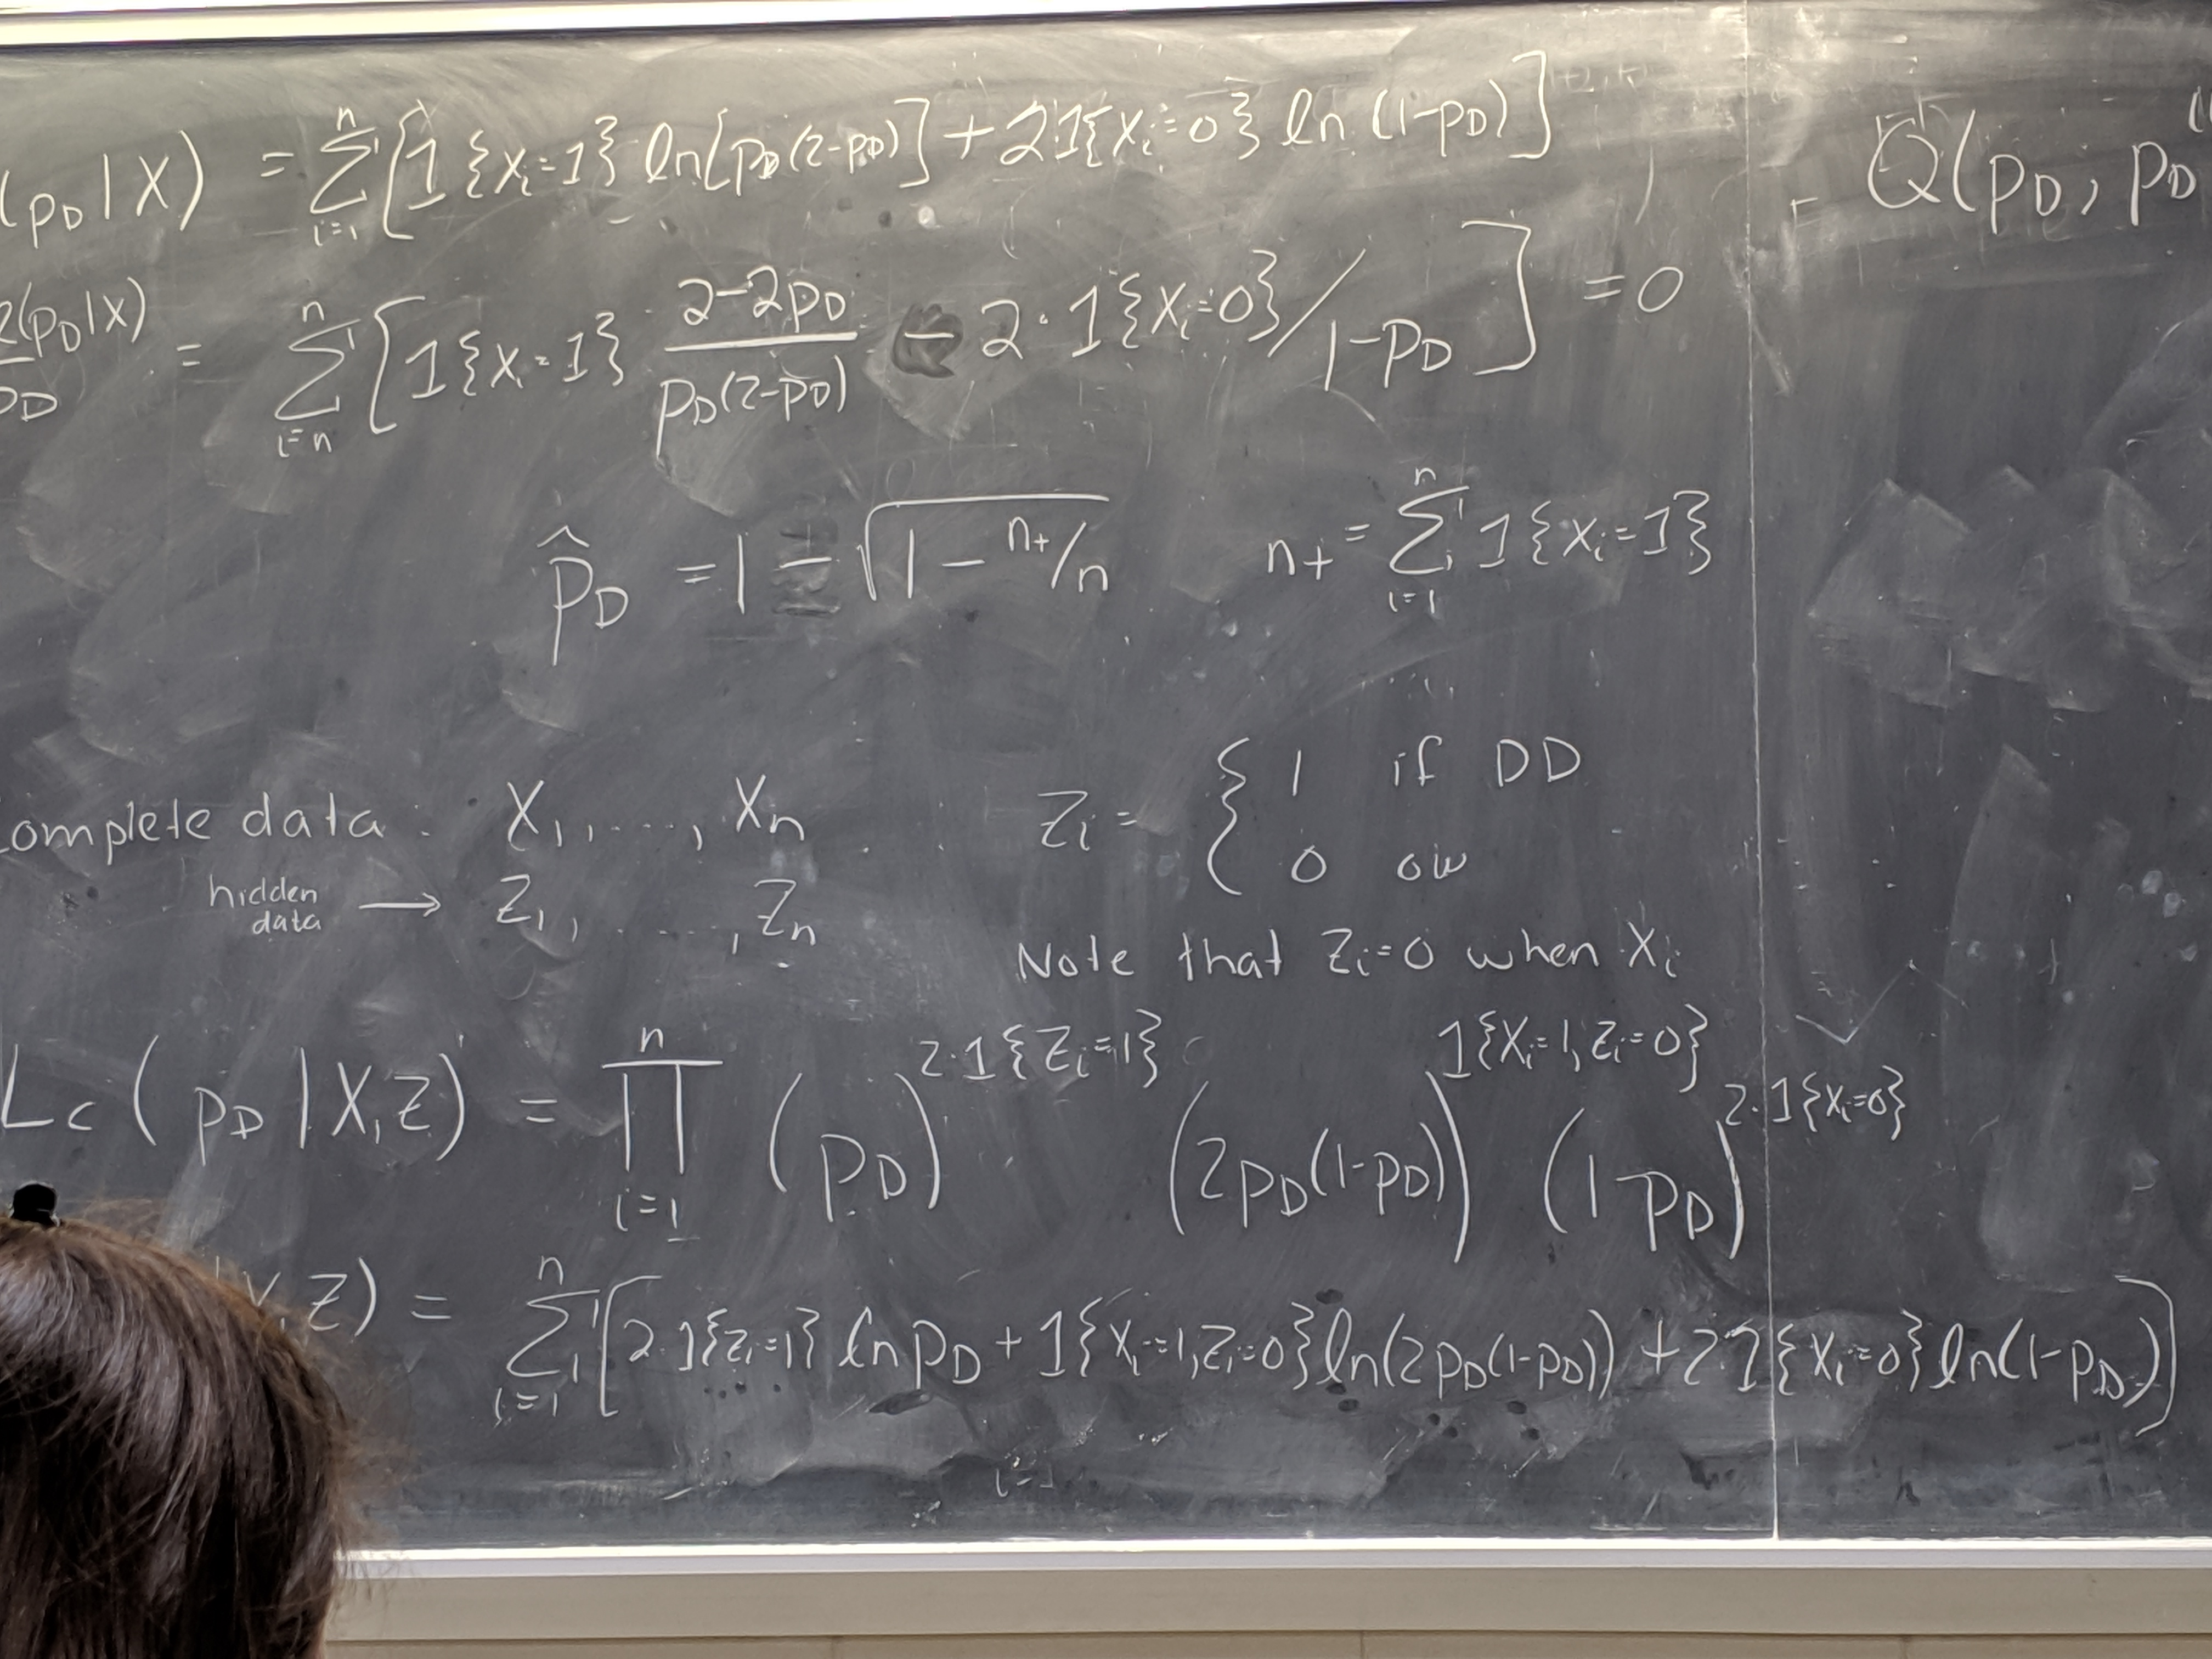

In [11]:
display(Image("img/3.jpg"))

# STEP 1. Determine the likelihood

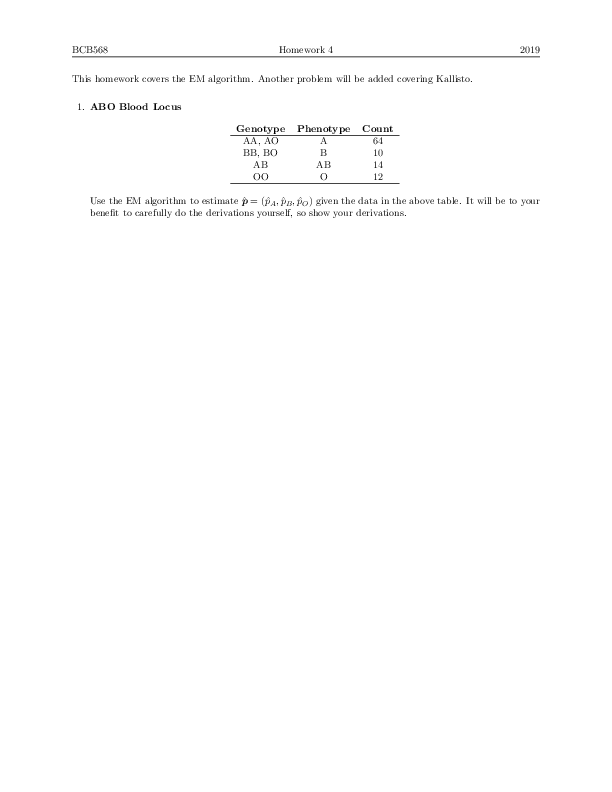

In [1]:
from wand.image import Image as WImage
imageFromPdf = WImage(filename='em.pdf')  
pages = len(imageFromPdf.sequence)  
image = WImage( width=imageFromPdf.width, height=imageFromPdf.height * pages)  
for i in range(pages):  image.composite(imageFromPdf.sequence[i], top=imageFromPdf.height * i, left=0)  
image.format="png"  
image 

$Pr(Z_i = k | X_i, \theta^{(m)})$ and $Pr(X_i, Zi = k)$

In [3]:
types = {'A':['AO','AO'], 'B':['BO','BO'], 'O':['OO'],'AB':['AB']}

for pheno in types:   
    genos = []
    for geno in types[pheno]: genos.append("Pr(Z_i = %s)" % (geno))
    print("1{X_i = %s} * [%s]" % (pheno," + ".join(genos)))
        

1{X_i = A} * [Pr(Z_i = AO) + Pr(Z_i = AO)]
1{X_i = B} * [Pr(Z_i = BO) + Pr(Z_i = BO)]
1{X_i = O} * [Pr(Z_i = OO)]
1{X_i = AB} * [Pr(Z_i = AB)]
